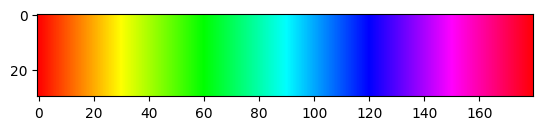

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

hue_spectrum = np.linspace(0, 179, dtype='uint8', num=180)      # linspace for default float
img = np.array([hue_spectrum]*30)       # this is single channel
saturation_channel = np.ones_like(img, dtype='uint8')*255       # create saturation_channel for create image as much as img
value_channel = np.ones_like(img, dtype='uint8')*255            # create value_channel for create image as much as img

hsv = cv.merge([img, saturation_channel, value_channel])        # merge for create 3 channel's image
final = cv.cvtColor(hsv, cv.COLOR_HSV2BGR)                      # opencv for drawing just use bgr then we need change hsv to bgr
plt.imshow(final[...,::-1])

Text(0.5, 1.0, 'mask')

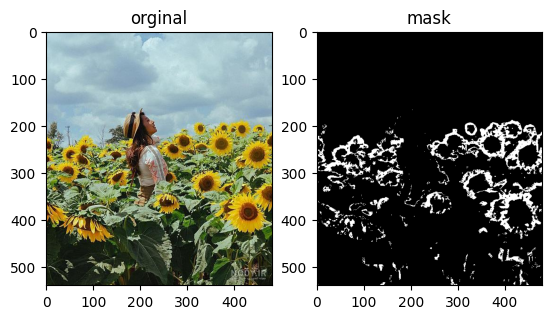

In [6]:
img = cv.imread(r"D:/test.computer_vision/l2/img/sun2.jpg")

lower = np.array([25,50,50])        # Determine the beginning and end of the interval  ( h,s,v)
upper = np.array([35,255,255])

hsv_img = cv.cvtColor(img, cv.COLOR_BGR2HSV)

mask = cv.inRange(hsv_img, lower, upper)        # mask = binary image, determine point is white and dont care point is black

plt.Figure(figsize=[12,6])
plt.subplot(121); plt.imshow(img[...,::-1]); plt.title('orginal')
plt.subplot(122); plt.imshow(mask, cmap='gray'); plt.title('mask')

Text(0.5, 1.0, 'mask beginner')

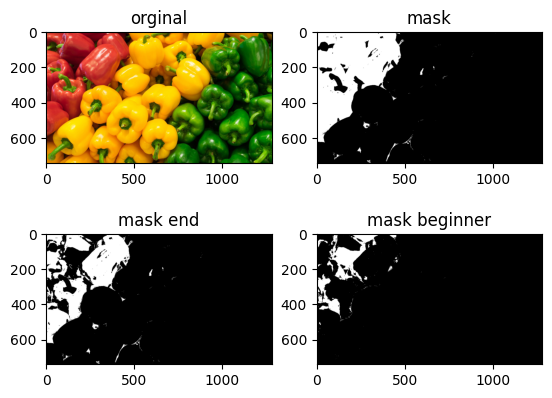

In [10]:
# فیلتر کردن رنگ قرمز حساسیت بیشتری دارد چون یکباز ابتدا و یکبار انتهای بازه است پس باید دو بار فیلتر براش نوشت

img = cv.imread(r"D:/test.computer_vision/l2/img/felfel-dolme.jpg")

hsv_img = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# lower mask (beginer)
lower = np.array([0,50,50])       
upper = np.array([10,255,255]) 
mask_0 = cv.inRange(hsv_img, lower, upper)        

# upper mask (end)
lower = np.array([160,50,50])
upper = np.array([179,255,255])
mask_1 = cv.inRange(hsv_img, lower, upper)        

# join mask
mask = mask_0 + mask_1      # + in bolian matrix like or 

plt.Figure(figsize=[17,7])
plt.subplot(221); plt.imshow(img[...,::-1]); plt.title('orginal')
plt.subplot(222); plt.imshow(mask, cmap='gray'); plt.title('mask')
plt.subplot(223); plt.imshow(mask_0, cmap='gray'); plt.title('mask end')
plt.subplot(224); plt.imshow(mask_1, cmap='gray'); plt.title('mask beginner')

Text(0.5, 1.0, 'result')

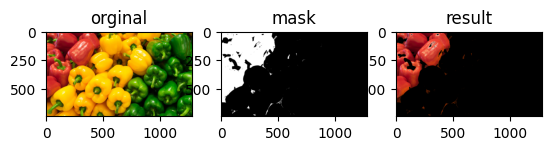

In [ ]:
img = cv.imread(r"D:/test.computer_vision/l2/img/felfel-dolme.jpg")

hsv_img = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# lower mask (beginer)
lower = np.array([0,50,50])       
upper = np.array([10,255,255]) 
mask_0 = cv.inRange(hsv_img, lower, upper)        

# upper mask (end)
lower = np.array([160,50,50])
upper = np.array([179,255,255])
mask_1 = cv.inRange(hsv_img, lower, upper)        

# join mask
mask = mask_0 + mask_1      

# mask_3channel = cv.merge([mask]*3)
# result = cv.bitwise_and(img, mask_3channel)         # bity operation , and with real image
# you can write below line instead of two line up
result = cv.bitwise_and(img, img, mask=mask)

plt.Figure(figsize=[17,7])
plt.subplot(231); plt.imshow(img[...,::-1]); plt.title('orginal')
plt.subplot(232); plt.imshow(mask, cmap='gray'); plt.title('mask')
plt.subplot(233); plt.imshow(result[...,::-1]); plt.title('result')

In [ ]:
cap = cv.VideoCapture(r'D:/test.computer_vision/l3/video/temp_video.mp4')       # you can test real white webcame (0)

while True:
    ret, frame = cap.read()
    if not ret: 
        break

    hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)

    lower = np.array([90,50,50])
    upper = np.array([95,255,255])

    mask = cv.inRange(hsv, lower, upper)
    res = cv.bitwise_and(frame, frame, mask=mask)

    cv.imshow('frame', frame)
    cv.imshow('mask', mask)
    cv.imshow('res', res)

    k = cv.waitKey(1) & 0xFF 
    if k == 27:
        break

cv.destroyAllWindows()
cap.release()

In [ ]:
# find bgr color in hsv

blue = np.array([[[255,0,0]]], 'uint8')     # 1*1*3
hsv_blue = cv.cvtColor(blue, cv.COLOR_BGR2HSV)
print(hsv_blue)         # h,s,v

[[[120 255 255]]]


In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

cap = cv.VideoCapture(r'D:/test.computer_vision/l3/video/temp_video.mp4')      

while True:
    ret, frame = cap.read()
    if not ret: 
        break

    hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)

    lower = np.array([85,50,50])
    upper = np.array([115,255,255])

    mask = cv.inRange(hsv, lower, upper)
    contours, _ =cv.findContours(mask, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)        # find contour find point of around shape
    center, radius = cv.minEnclosingCircle(contours[0])
    center = int(center[0]), int(center[1])
    radius = int(radius)
    cv.circle(frame, center, radius, (0,0,255), 2)
    cv.imshow('frame', frame)

    k = cv.waitKey(1) & 0xFF 
    if k == 27:
        break

cv.destroyAllWindows()
cap.release()

IndexError: tuple index out of range

: 

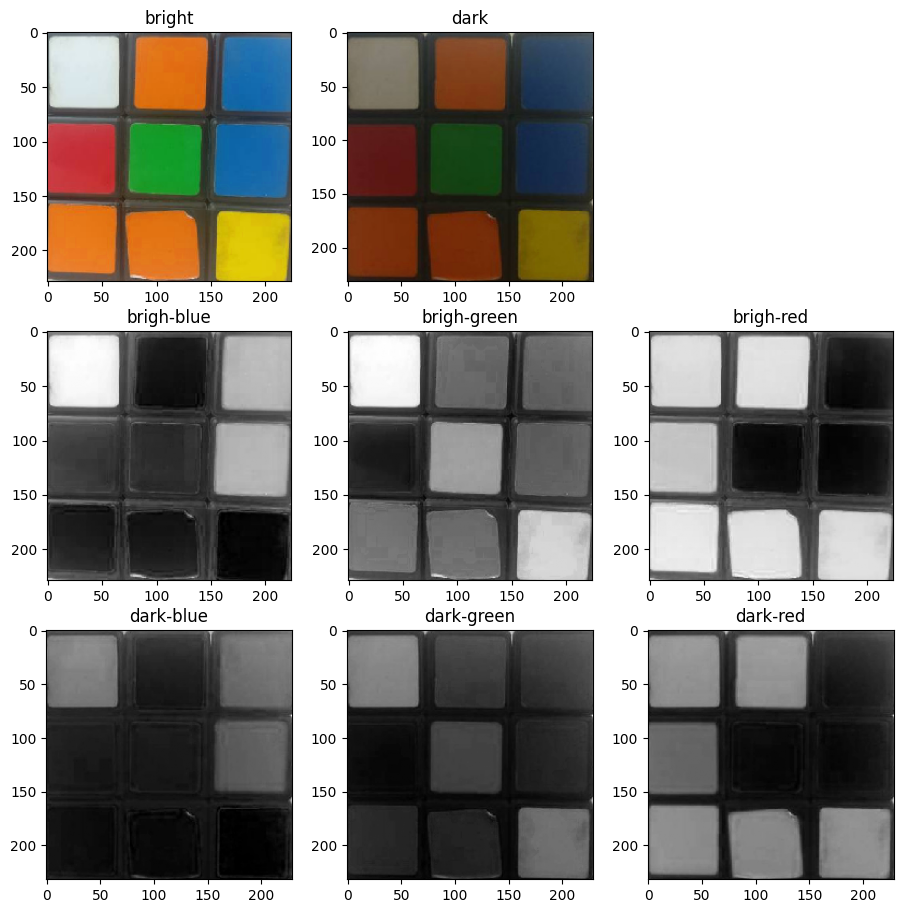

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

bright = cv2.imread(r"D:/test.computer_vision/l2/img/cube-bright.png")
dark = cv2.imread(r"D:/test.computer_vision/l2/img/cube-dark.png")

#show
plt.figure(figsize=[11,11])
plt.subplot(331);plt.imshow(bright[...,::-1]);plt.title("bright");
plt.subplot(332);plt.imshow(dark[...,::-1]);plt.title("dark");

plt.subplot(334);plt.imshow(bright[...,0], cmap='gray');plt.title("brigh-blue");
plt.subplot(335);plt.imshow(bright[...,1], cmap='gray');plt.title("brigh-green");
plt.subplot(336);plt.imshow(bright[...,2], cmap='gray');plt.title("brigh-red");

plt.subplot(337);plt.imshow(dark[...,0], cmap='gray');plt.title("dark-blue");
plt.subplot(338);plt.imshow(dark[...,1], cmap='gray');plt.title("dark-green");
plt.subplot(339);plt.imshow(dark[...,2], cmap='gray');plt.title("dark-red");

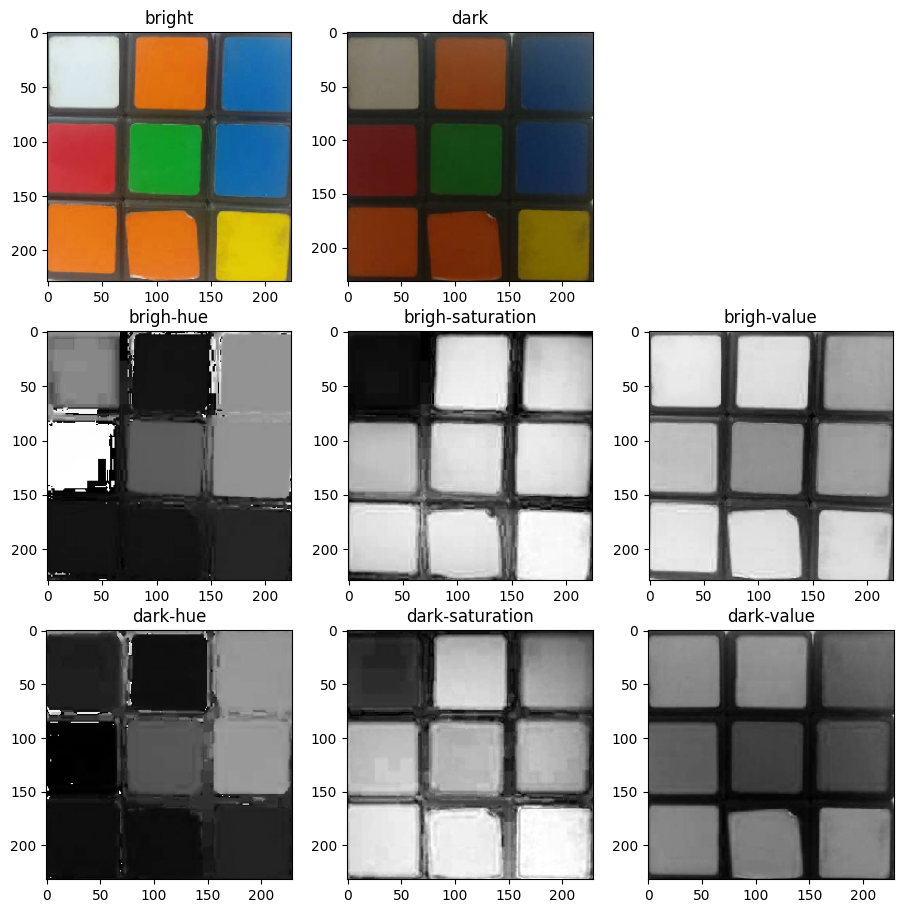

In [2]:
# HSV
brightHSV = cv2.cvtColor(bright, cv2.COLOR_BGR2HSV)
darkHSV = cv2.cvtColor(dark, cv2.COLOR_BGR2HSV)

#show
plt.figure(figsize=[11,11])
plt.subplot(331);plt.imshow(bright[...,::-1]);plt.title("bright");
plt.subplot(332);plt.imshow(dark[...,::-1]);plt.title("dark");

plt.subplot(334);plt.imshow(brightHSV[...,0], cmap='gray');plt.title("brigh-hue");
plt.subplot(335);plt.imshow(brightHSV[...,1], cmap='gray');plt.title("brigh-saturation");
plt.subplot(336);plt.imshow(brightHSV[...,2], cmap='gray');plt.title("brigh-value");

plt.subplot(337);plt.imshow(darkHSV[...,0], cmap='gray');plt.title("dark-hue");
plt.subplot(338);plt.imshow(darkHSV[...,1], cmap='gray');plt.title("dark-saturation");
plt.subplot(339);plt.imshow(darkHSV[...,2], cmap='gray');plt.title("dark-value");

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">بررسی در فضار رنگی LAB</div>

    L – Lightness ( Intensity ).
    a – color component ranging from Green to Magenta.
    b – color component ranging from Blue to Yellow.
    
![LAB Color space](lecture_images/lAB_color.png "LAB Color-space")
       
In this color-opponent space, L stands for the Luminance dimension, while a and b are the color-opponent dimensions. The Lab ranges are:

    0 > L > 100 ⇒ OpenCV range = L*255/100 (1 > L > 255)
    -127 > a > 127 ⇒ OpenCV range = a + 128 (1 > a > 255)
    -127 > b > 127 ⇒ OpenCV range = b + 128 (1 > b > 255)


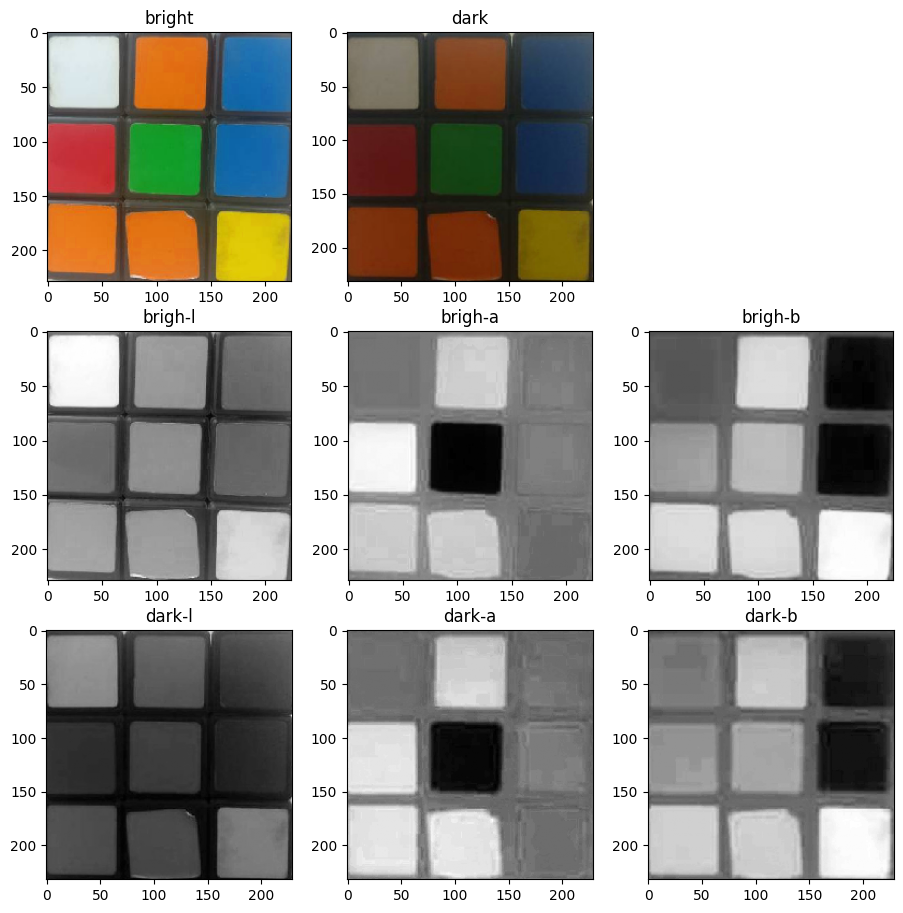

In [3]:
# LAB
brightLAB = cv2.cvtColor(bright, cv2.COLOR_BGR2LAB)
darkLAB = cv2.cvtColor(dark, cv2.COLOR_BGR2LAB)

#show
plt.figure(figsize=[11,11])
plt.subplot(331);plt.imshow(bright[...,::-1]);plt.title("bright");
plt.subplot(332);plt.imshow(dark[...,::-1]);plt.title("dark");

plt.subplot(334);plt.imshow(brightLAB[...,0], cmap='gray');plt.title("brigh-l");
plt.subplot(335);plt.imshow(brightLAB[...,1], cmap='gray');plt.title("brigh-a");
plt.subplot(336);plt.imshow(brightLAB[...,2], cmap='gray');plt.title("brigh-b");

plt.subplot(337);plt.imshow(darkLAB[...,0], cmap='gray');plt.title("dark-l");
plt.subplot(338);plt.imshow(darkLAB[...,1], cmap='gray');plt.title("dark-a");
plt.subplot(339);plt.imshow(darkLAB[...,2], cmap='gray');plt.title("dark-b");


### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">بررسی در فضار رنگی YCrCb</div>

    Y – Luminance or Luma component obtained from RGB after gamma correction.
    Cr = R – Y ( how far is the red component from Luma ).
    Cb = B – Y ( how far is the blue component from Luma ).


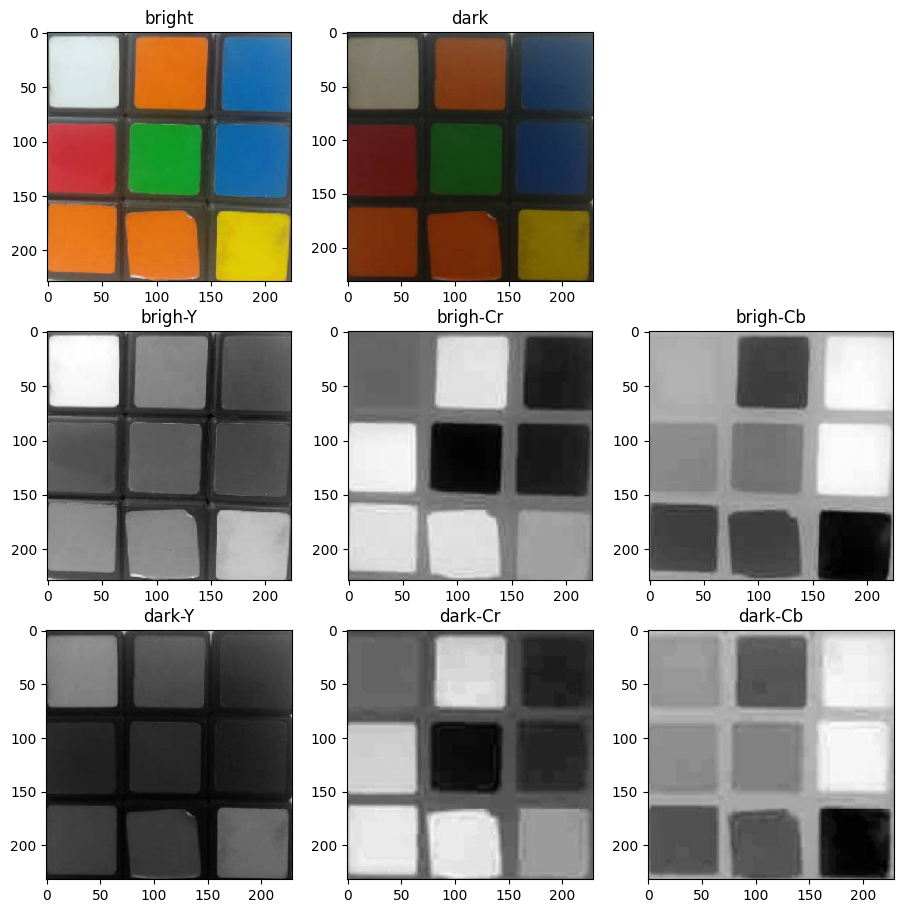

In [4]:
# YCrCb
brightYCrCb = cv2.cvtColor(bright, cv2.COLOR_BGR2YCrCb)
darkYCrCb = cv2.cvtColor(dark, cv2.COLOR_BGR2YCrCb)

#show
plt.figure(figsize=[11,11])
plt.subplot(331);plt.imshow(bright[...,::-1]);plt.title("bright");
plt.subplot(332);plt.imshow(dark[...,::-1]);plt.title("dark");

plt.subplot(334);plt.imshow(brightYCrCb[...,0], cmap='gray');plt.title("brigh-Y");
plt.subplot(335);plt.imshow(brightYCrCb[...,1], cmap='gray');plt.title("brigh-Cr");
plt.subplot(336);plt.imshow(brightYCrCb[...,2], cmap='gray');plt.title("brigh-Cb");

plt.subplot(337);plt.imshow(darkYCrCb[...,0], cmap='gray');plt.title("dark-Y");
plt.subplot(338);plt.imshow(darkYCrCb[...,1], cmap='gray');plt.title("dark-Cr");
plt.subplot(339);plt.imshow(darkYCrCb[...,2], cmap='gray');plt.title("dark-Cb");


hsv: [ 57.86045  247.845475 246.94305 ]


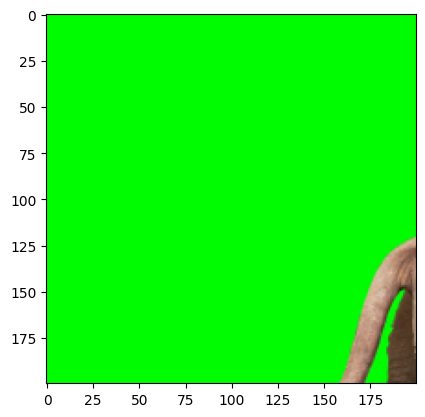

In [ ]:
import cv2 as cv

img = cv2.imread(r"D:/test.computer_vision/l2/img/green_back.png")
croped_img = img[:200,:200,:]
plt.imshow(croped_img[...,::-1])

hsv = cv.cvtColor(croped_img, cv.COLOR_BGR2HSV)
print('hsv:', np.mean(hsv, axis=(0,1)))             # mean == average

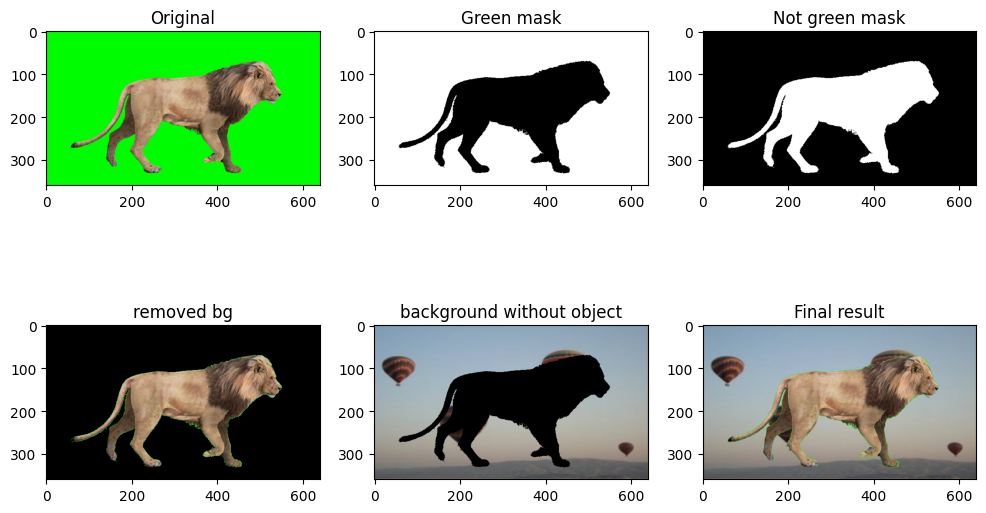

In [6]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

input_image = cv2.imread(r"D:/test.computer_vision/l2/img/green_back.png")
bg_image = cv2.imread(r"D:/test.computer_vision/l2/img/balloon.png")
hsv = cv2.cvtColor(input_image, cv2.COLOR_BGR2HSV)

h, w, _ =input_image.shape
bg_image = cv2.resize(bg_image,(w, h))
l_green = np.array([60, 50, 50])
u_green = np.array([80, 255, 255])

mask = cv2.inRange(hsv, l_green, u_green)
mask_not_green = cv2.bitwise_not(mask)

new_bg = cv2.bitwise_and(bg_image, bg_image, mask=mask)
removed_bg = cv2.bitwise_and(input_image, input_image, mask=mask_not_green)

final = cv2.add(removed_bg, new_bg)

plt.figure(figsize=[12,7])
plt.subplot(231);plt.imshow(input_image[...,::-1]);plt.title("Original");
plt.subplot(232);plt.imshow(mask, cmap='gray');plt.title("Green mask");
plt.subplot(233);plt.imshow(mask_not_green, cmap='gray');plt.title("Not green mask");
#second row
plt.subplot(234);plt.imshow(removed_bg[...,::-1]);plt.title("removed bg");
plt.subplot(235);plt.imshow(new_bg[...,::-1]);plt.title("background without object");
plt.subplot(236);plt.imshow(final[...,::-1]);plt.title("Final result");


In [ ]:
import cv2
import numpy as np

# Load video clip
cap = cv2.VideoCapture('video white green back')
bg_image = cv2.imread(r"D:/test.computer_vision/l2/img/balloon.png")

# Get the height and width of the frame (required to be an interger)
w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)) 
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
#resize to frame size
bg_image = cv2.resize(bg_image,(w, h))

while True:
    ret, frame = cap.read()
    if not ret:
        break
    background = bg_image.copy()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    l_green = np.array([60, 50, 50])
    u_green = np.array([80, 255, 255])

    mask = cv2.inRange(hsv, l_green, u_green)
    mask_not_green = cv2.bitwise_not(mask)
    removed_bg = cv2.bitwise_and(frame, frame, mask=mask_not_green)
    background = cv2.bitwise_and(background, background, mask=mask)

    final = cv2.add(removed_bg, background)
    cv2.imshow("result", final)
    cv2.waitKey(25)

        
cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

In [ ]:
import cv2
import numpy as np

# Load video clip
cap = cv2.VideoCapture('./videos/akhavan-green-bg.mp4')
bg_image = cv2.imread("images/balloon.png")

# Get the height and width of the frame (required to be an interger)
w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)) 
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
#resize to frame size
bg_image = cv2.resize(bg_image,(w, h))

while True:
    ret, frame = cap.read()
    if not ret:
        break
    background = bg_image.copy()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    l_green = np.array([60, 50, 50])
    u_green = np.array([80, 255, 255])

    mask = cv2.inRange(hsv, l_green, u_green)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    mask = cv2.dilate(mask, kernel)
    mask_not_green = cv2.bitwise_not(mask)

    removed_bg = cv2.bitwise_and(frame, frame, mask=mask_not_green)
    background = cv2.bitwise_and(background, background, mask=mask)

    final = cv2.add(removed_bg, background)
    cv2.imshow("result", final)
    cv2.waitKey(25)

        
cap.release()
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np

# Load video clip
cap = cv2.VideoCapture('./videos/akhavan-green-bg.mp4')
bg_image = cv2.imread("images/balloon.png")

# Get the height and width of the frame (required to be an interger)
w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)) 
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
#resize to frame size
bg_image = cv2.resize(bg_image,(w, h))

while True:
    ret, frame = cap.read()
    if not ret:
        break
    background = bg_image.copy()
    lab = cv2.cvtColor(frame, cv2.COLOR_BGR2LAB)
    a_channel = lab[:,:,1]
    _, th = cv2.threshold(a_channel,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    mask_green = cv2.bitwise_not(th)
    removed_bg = cv2.bitwise_and(frame, frame, mask=th)
    background = cv2.bitwise_and(background, background, mask=mask_green)

    final = cv2.add(removed_bg, background)
    cv2.imshow("result", final)
    cv2.waitKey(25)

        
cap.release()
cv2.destroyAllWindows()

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# mouse callback function
def draw_circle(event,x,y,flags,param):
    global img
    if event == cv2.EVENT_LBUTTONDOWN:
        bgr = img[x:x+1,y:y+1,:]
        print("BGR: ", bgr)
        hsv = cv2.cvtColor(bgr, cv2.COLOR_BGR2HSV)
        print("HSV: ", hsv)
        cv2.circle(img,(x,y),5,(0,255,0),+2)

# Create a black image, a window and bind the function to window
img = cv2.imread(r"D:/test.computer_vision/l2/img/PopEffects.jpeg")

cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)

while(1):
    cv2.imshow('image',img)
    if cv2.waitKey(1) & 0xFF == 27:
        break
cv2.destroyAllWindows()



BGR:  [[[95 92 87]]]
HSV:  [[[101  21  95]]]


In [4]:
def pop_efect(image, lower, upper):
    img = image.copy()
    #convert the BGR image to HSV colour space
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    #obtain the grayscale image of the original image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #create a mask using the bounds set
    mask = cv2.inRange(hsv, lower, upper)
    #create an inverse of the mask
    mask_inv = cv2.bitwise_not(mask)
    #Take only region of image from the mask
    res = cv2.bitwise_and(img, img, mask=mask)
    #Filter the regions containing colors other than masked region from the grayscale image
    background = cv2.bitwise_and(gray, gray, mask = mask_inv)
    #convert the one channelled grayscale background to a three channelled image
    background = cv2.merge([background]*3)
    #add the color region to gray image
    return cv2.add(res, background)

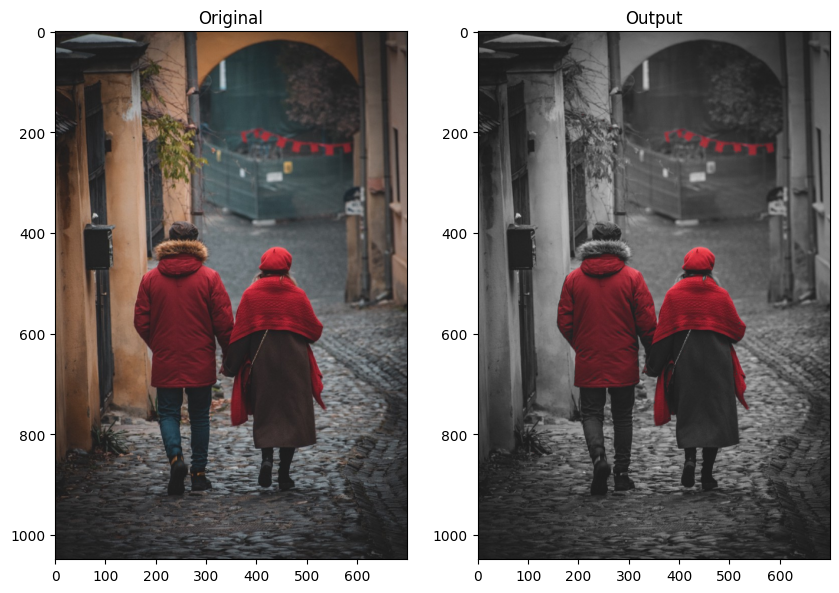

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# mouse callback function
def apply_pop_efect(event,x,y,flags,param, crange=10):
    global image, new_image
    if event == cv2.EVENT_LBUTTONDOWN:
        hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        h, s, v = hsv[x,y,:]
        lower_h = max(0, h-crange)
        upper_h = min(179, h+crange)
        #set the bounds for the red hue
        lower = np.array([lower_h,50,50])
        upper = np.array([upper_h,255,255])
        new_image = pop_efect(image, lower, upper)
        cv2.imshow("result", new_image)
        
        
# Create a black image, a window and bind the function to window
image = cv2.imread(r"D:/test.computer_vision/l2/img/PopEffects.jpeg")
new_image = image.copy()

cv2.namedWindow('image')
cv2.setMouseCallback('image',apply_pop_efect)

while True:
    cv2.imshow('image',image)
    if cv2.waitKey(1) & 0xFF == 27:
        break
cv2.destroyAllWindows()
            
plt.figure(figsize=[10,15])
plt.subplot(121);plt.imshow(image[...,::-1]);plt.title("Original");
plt.subplot(122);plt.imshow(new_image[...,::-1]);plt.title("Output");

In [ ]:
from sklearn.datasets import make_blobs         # for clustring in ML
import matplotlib.pyplot as plt
import numpy as np


(100, 2)

In [9]:
X, _ = make_blobs(random_state=42)
X.shape

(100, 2)

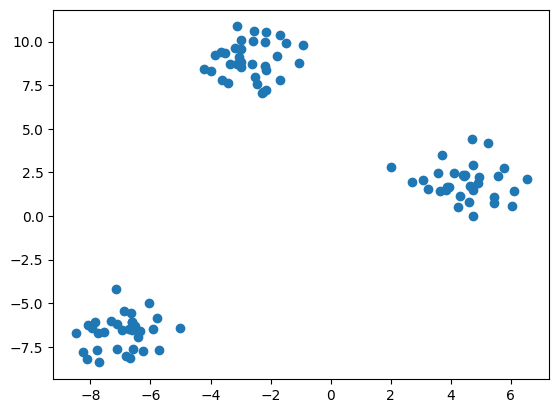

In [10]:
plt.scatter(X[:, 0], X[:, 1]);

In [11]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)

In [12]:
labels = kmeans.fit_predict(X)

In [13]:
labels

array([1, 2, 0, 2, 1, 2, 0, 2, 2, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 2, 1, 1, 1, 1, 2, 2, 1, 0, 0, 0, 0, 2, 2, 1, 0, 2, 0,
       0, 2, 1, 1, 1, 2, 2, 2, 0, 1, 1, 1, 0, 0, 2, 0, 1, 2, 1, 2, 1, 1,
       2, 1, 2, 2, 2, 1, 1, 0, 2, 1, 2, 1, 2, 2, 0, 2, 0, 1, 0, 0, 0, 2,
       0, 2, 2, 2, 0, 2, 0, 0, 0, 2, 1, 0], dtype=int32)

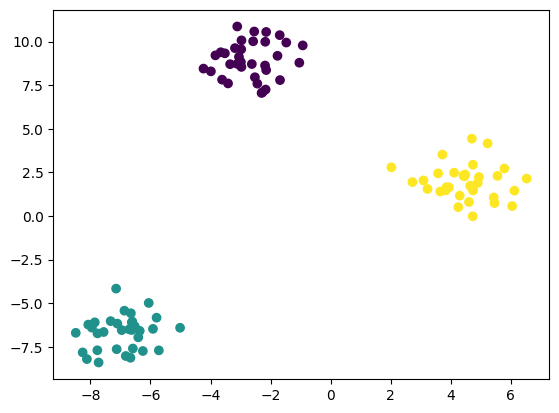

In [14]:
plt.scatter(X[:, 0], X[:, 1], c=labels);

In [2]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


n_clusters = 5

#read image
img = cv2.imread(r"D:/test.computer_vision/l2/img/felfel-dolme.jpg")

#reshape to a list of pixels
flat_img = img.reshape((-1, 3))

#using k-means to cluster pixels
kmeans = KMeans(n_clusters = n_clusters)
kmeans.fit(flat_img)

#the cluster centers are our dominant colors.
dominant_colors = np.array(kmeans.cluster_centers_, dtype='uint8')

labels = kmeans.labels_

print(dominant_colors)
print(labels)

[[  2  62  16]
 [ 36  78 209]
 [ 13  35 129]
 [ 12 142  80]
 [  9 183 246]]
[1 1 1 ... 0 0 0]


In [3]:
img.shape

(741, 1280, 3)

In [4]:
741*1280

948480

In [5]:
len(labels)

948480

In [6]:
percentages = np.bincount(labels)/len(flat_img)
percentages

array([0.26544893, 0.15698802, 0.09797255, 0.13784793, 0.34174258])

In [7]:
p_and_c = zip(percentages,dominant_colors)
p_and_c = sorted(p_and_c,reverse=True)

In [8]:
p_and_c

[(np.float64(0.34174257759784077), array([  9, 183, 246], dtype=uint8)),
 (np.float64(0.26544892881241566), array([ 2, 62, 16], dtype=uint8)),
 (np.float64(0.1569880229419703), array([ 36,  78, 209], dtype=uint8)),
 (np.float64(0.13784792510121457), array([ 12, 142,  80], dtype=uint8)),
 (np.float64(0.09797254554655871), array([ 13,  35, 129], dtype=uint8))]

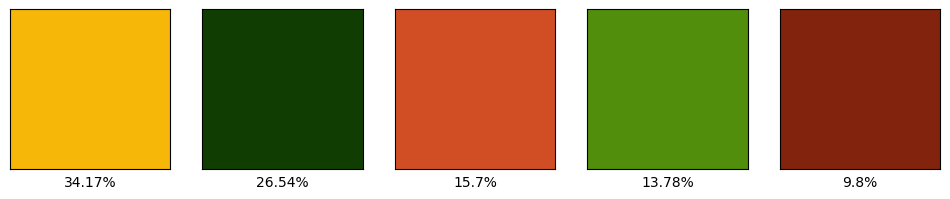

In [9]:
block = np.ones((50,50,3),dtype='uint')
plt.figure(figsize=(12,8))
for i in range(n_clusters):
    plt.subplot(1,n_clusters,i+1)
    block[:] = p_and_c[i][1][::-1] # we have done this to convert bgr(opencv) to rgb(matplotlib) 
    plt.imshow(block)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(str(round(p_and_c[i][0]*100,2))+'%')

([], [])

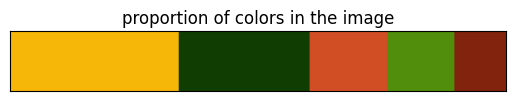

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

bar = np.ones((60,500,3), dtype='uint8')
plt.Figure(figsize=(12,8))
plt.title('proportion of colors in the image')
start = 0
i = 1
for p,c in p_and_c:
    end = start+int(p*500)
    if i == n_clusters:
        bar[:,start:] = c[::-1]     # :,start:]   تمام سطرها و ستون ها از استارت تا اخر
    else: 
        bar[:,start:end] = c[::-1]
    start = end
    i += 1

plt.imshow(bar)
plt.xticks([])      # hidden number of raw and col
plt.yticks([])

In [ ]:
# rows = 1000
# cols = int((img.shape[0]/img.shape[1])*rows)
# img = cv2.resize(img,dsize=(rows,cols),interpolation=cv2.INTER_LINEAR)

# copy = img.copy()
# cv2.rectangle(copy,(rows//2-250,cols//2-90),(rows//2+
#                                              250,cols//2+110),(255,255,255),-1)

# final = cv2.addWeighted(img,0.1,copy,0.9,0)
# cv2.putText(final,'Most Dominant Colors in the Image',(rows//2-230,cols//2-40),cv2.FONT_HERSHEY_DUPLEX,0.8,(0,0,0),1,cv2.LINE_AA)


# start = rows//2-220
# for i in range(5):
#     end = start+70
#     final[cols//2:cols//2+70,start:end] = p_and_c[i][1]
#     cv2.putText(final,str(i+1),(start+25,cols//2+45),cv2.FONT_HERSHEY_DUPLEX,1,(255,255,255),1,cv2.LINE_AA)
#     start = end+20

# plt.show()

# cv2.imshow('img',final)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

Text(0.5, 1.0, 'histogram with 5 bins')

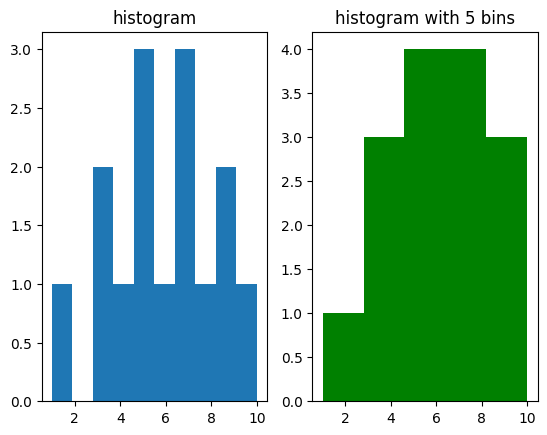

In [12]:
list_of_num = np.array([5,4,5,10,3,5,6,9,7,8,7,9,1,3,7])

plt.Figure(figsize=([10,3]))
plt.subplot(121); plt.hist(list_of_num); plt.title('histogram')
plt.subplot(122); plt.hist(list_of_num, 5, color='green'); plt.title('histogram with 5 bins')

Text(0.5, 1.0, 'histogram with step')

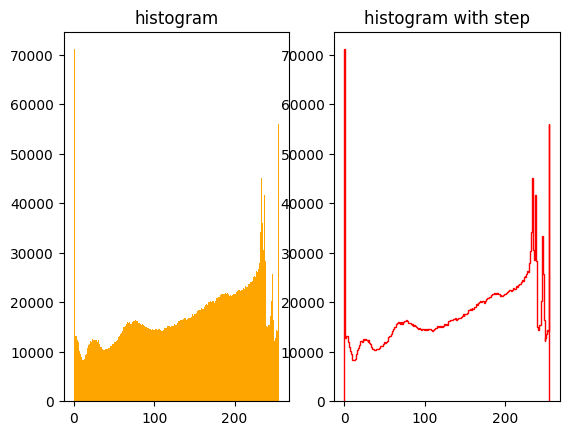

In [17]:
img = cv.imread(r"D:/test.computer_vision/l2/img/sunflowers.jpg")

plt.Figure(figsize=([10,3]))
plt.subplot(121); plt.hist(img.ravel(), 256, color='orange'); plt.title('histogram')     # ravel change matrix to vectore
plt.subplot(122); plt.hist(img.ravel(), 256, histtype='step', color='red'); plt.title('histogram with step')

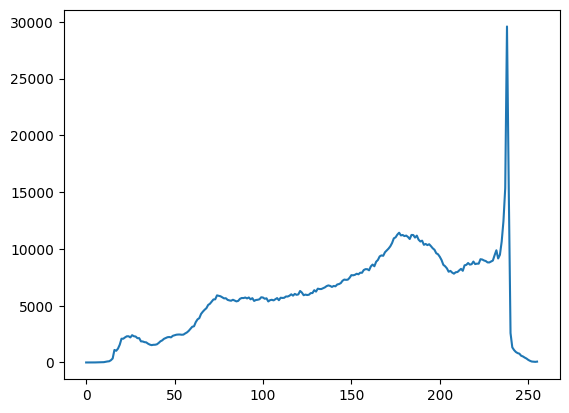

In [ ]:
img = cv.imread(r"D:/test.computer_vision/l2/img/sunflowers.jpg", 0)

hist = cv.calcHist([img], [0], None, [256], [0,256])        # cv.calchist(image, channel(color), mask, bins=histsize, range)
plt.Figure(figsize=[5,3])
plt.plot(hist)

Text(0.5, 1.0, 'light histogram')

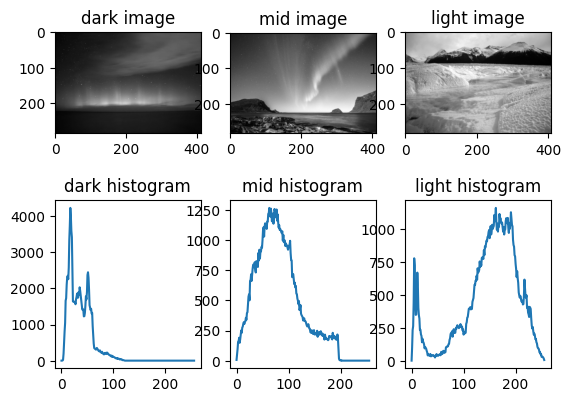

In [19]:
dark_img = cv.imread(r"D:/test.computer_vision/l2/img/dark.png")
mid_img = cv.imread(r"D:/test.computer_vision/l2/img/mid.png")
light_img = cv.imread(r"D:/test.computer_vision/l2/img/light.png")

graydark = cv.cvtColor(dark_img, cv.COLOR_BGR2GRAY)
graymid = cv.cvtColor(mid_img, cv.COLOR_BGR2GRAY)
graylight = cv.cvtColor(light_img, cv.COLOR_BGR2GRAY)

dark_hist = cv.calcHist([graydark], [0], None, [256], [0,256])        
mid_hist = cv.calcHist([graymid], [0], None, [256], [0,256])        
light_hist = cv.calcHist([graylight], [0], None, [256], [0,256])        

plt.Figure(figsize=[12,7])
plt.subplot(231); plt.imshow(graydark, cmap='gray'); plt.title('dark image')
plt.subplot(232); plt.imshow(graymid, cmap='gray'); plt.title('mid image')
plt.subplot(233); plt.imshow(graylight, cmap='gray'); plt.title('light image')
plt.subplot(234); plt.plot(dark_hist); plt.title('dark histogram')
plt.subplot(235); plt.plot(mid_hist); plt.title('mid histogram')
plt.subplot(236); plt.plot(light_hist); plt.title('light histogram')

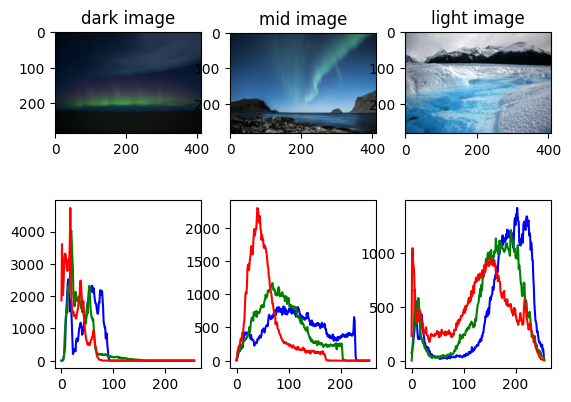

In [21]:
dark_img = cv.imread(r"D:/test.computer_vision/l2/img/dark.png")
mid_img = cv.imread(r"D:/test.computer_vision/l2/img/mid.png")
light_img = cv.imread(r"D:/test.computer_vision/l2/img/light.png")

plt.Figure(figsize=[12,7])
plt.subplot(231); plt.imshow(dark_img[...,::-1]); plt.title('dark image')
plt.subplot(232); plt.imshow(mid_img[...,::-1]); plt.title('mid image')
plt.subplot(233); plt.imshow(light_img[...,::-1]); plt.title('light image')

color = ('b', 'g', 'r')

plt.subplot(234);
for i, col in enumerate(color):
    histogram = cv.calcHist([dark_img], [i], None, [256], [0,256])
    plt.plot(histogram, color = col)

plt.subplot(235);
for i, col in enumerate(color):
    histogram = cv.calcHist([mid_img], [i], None, [256], [0,256])
    plt.plot(histogram, color = col)

plt.subplot(236);
for i, col in enumerate(color):
    histogram = cv.calcHist([light_img], [i], None, [256], [0,256])
    plt.plot(histogram, color = col)

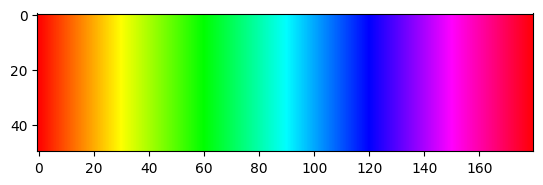

In [23]:
hue_spectrum = np.linspace(0, 179, dtype='uint8', num=180)      # get to me 180 points of 0 to 179
img = np.array([hue_spectrum]*50)                               # 50 row in 180 column
saturation_channel = np.ones_like(img, dtype='uint8')*255
value_channel = np.ones_like(img, dtype='uint8')*255

hsv = cv.merge([img, saturation_channel, value_channel])
final = cv.cvtColor(hsv, cv.COLOR_HSV2BGR)
plt.imshow(final[...,::-1])

In [30]:
def plot_hsv_histogra(img_path):
    img = cv.imread(img_path)
    hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
    hue_hist = cv.calcHist([hsv], [0], None, [180], [0,180])

    plt.Figure(figsize=[10,3])
    plt.subplot(121); plt.imshow(img[...,::-1]); plt.xticks([]); plt.yticks([]); 
    plt.subplot(222); plt.plot(hue_hist, color='red'); plt.xticks([]); plt.yticks([]); 
    plt.subplot(224); plt.imshow(final[...,::-1]); plt.xticks([]); plt.yticks([]); 

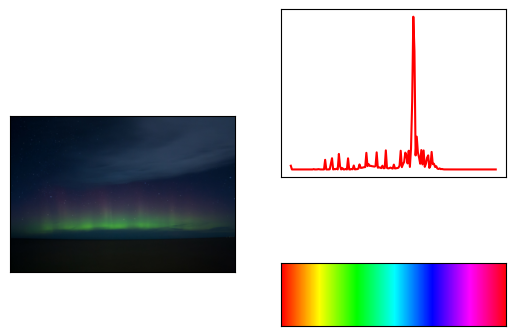

In [31]:
plot_hsv_histogra(r"D:/test.computer_vision/l2/img/dark.png")

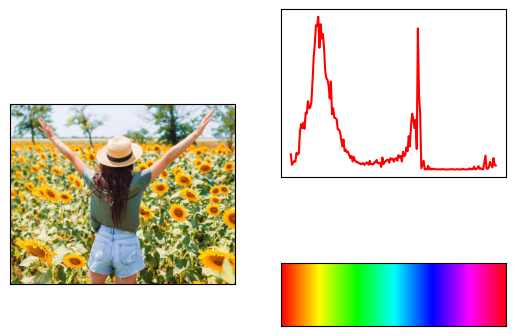

In [26]:
plot_hsv_histogra(r"D:/test.computer_vision/l2/img/sunflowers.jpg")


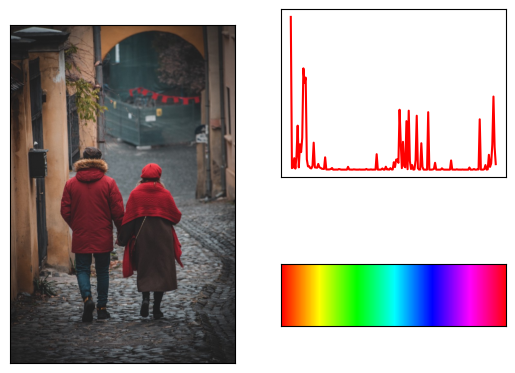

In [27]:
plot_hsv_histogra(r"D:/test.computer_vision/l2/img/PopEffects.jpeg")


Text(0.5, 1.0, 'equlize histogram')

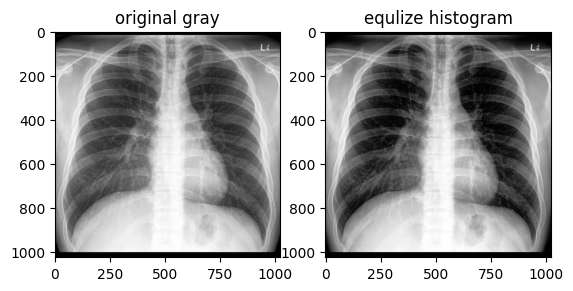

In [ ]:
img = cv.imread(r"D:/test.computer_vision/l2/img/xray.jpg", 0)
result = cv.equalizeHist(img)                                       # global histogram equalization

plt.Figure(figsize=[8,4])
plt.subplot(121); plt.imshow(img, cmap='gray'); plt.title('original gray') 
plt.subplot(122); plt.imshow(result, cmap='gray'); plt.title('equlize histogram') 

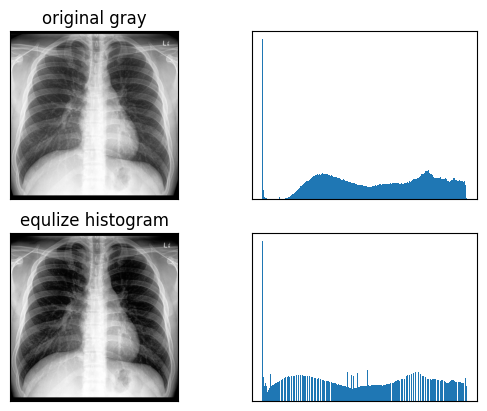

In [34]:
img = cv.imread(r"D:/test.computer_vision/l2/img/xray.jpg", 0)
result = cv.equalizeHist(img)

plt.Figure(figsize=[12,7])
plt.subplot(221); plt.imshow(img, cmap='gray'); plt.title('original gray'); plt.xticks([]); plt.yticks([]); 
plt.subplot(222); plt.hist(img.ravel(), 256); plt.xticks([]); plt.yticks([]); 
plt.subplot(223); plt.imshow(result, cmap='gray'); plt.title('equlize histogram'); plt.xticks([]); plt.yticks([]);  
plt.subplot(224); plt.hist(result.ravel(), 256); plt.xticks([]); plt.yticks([]); 


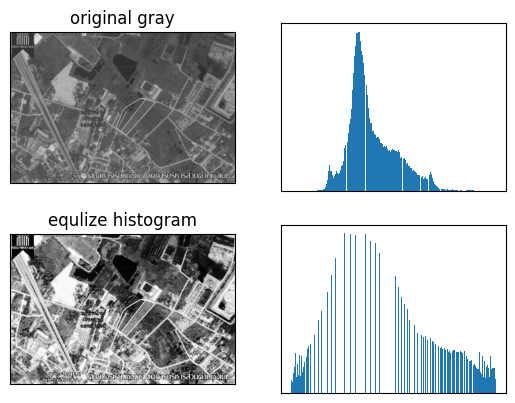

In [35]:
img = cv.imread(r"D:/test.computer_vision/l2/img/satellite.jpg", 0)
result = cv.equalizeHist(img)

plt.Figure(figsize=[12,7])
plt.subplot(221); plt.imshow(img, cmap='gray'); plt.title('original gray'); plt.xticks([]); plt.yticks([]); 
plt.subplot(222); plt.hist(img.ravel(), 256); plt.xticks([]); plt.yticks([]); 
plt.subplot(223); plt.imshow(result, cmap='gray'); plt.title('equlize histogram'); plt.xticks([]); plt.yticks([]);  
plt.subplot(224); plt.hist(result.ravel(), 256); plt.xticks([]); plt.yticks([]); 


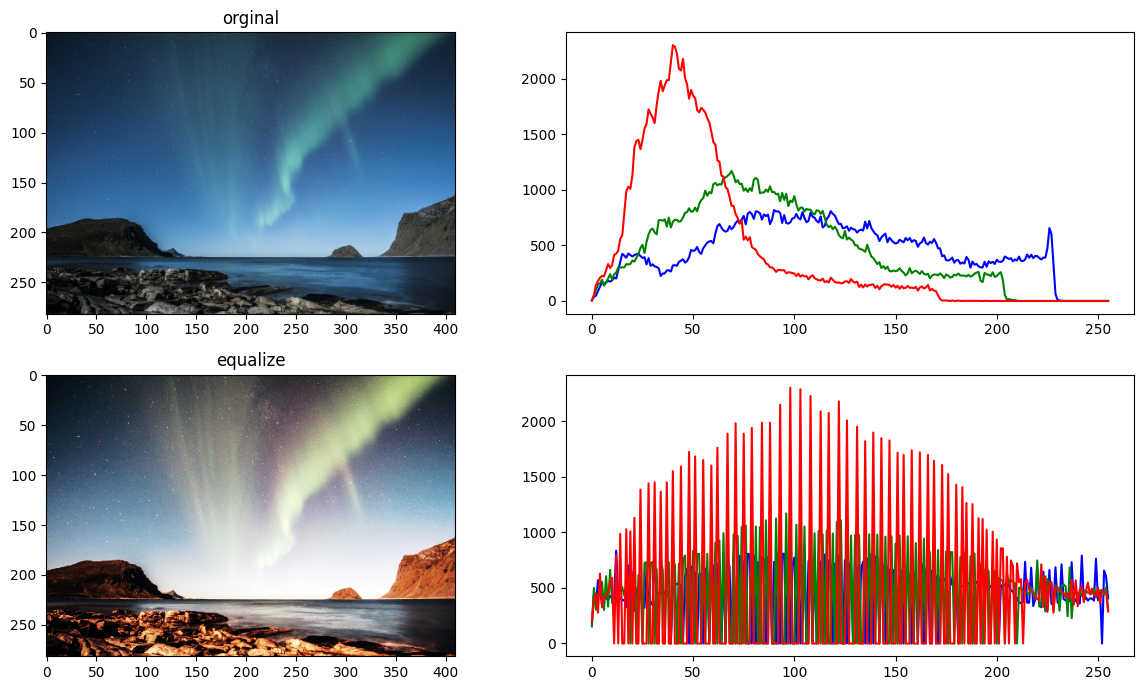

In [44]:
img = cv.imread(r"D:/test.computer_vision/l2/img/mid.png")

channels = cv.split(img)
eq_channel = []
for ch in channels:
    eq_channel.append(cv.equalizeHist(ch))
eq_img = cv.merge(eq_channel)

plt.figure(figsize=[12,7])
plt.subplot(221); plt.imshow(img[...,::-1]); plt.title('orginal'); 
plt.subplot(223); plt.imshow(eq_img[...,::-1]); plt.title('equalize'); 

color = ['b', 'g', 'r']
plt.subplot(222); 
for i, col in enumerate(color):
    histogram = cv.calcHist([img], [i], None, [256], [0,256])
    plt.plot(histogram, color = col)

plt.subplot(224); 
for i, col in enumerate(color):
    histogram = cv.calcHist([eq_img], [i], None, [256], [0,256])
    plt.plot(histogram, color = col)

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'equlize histogram')

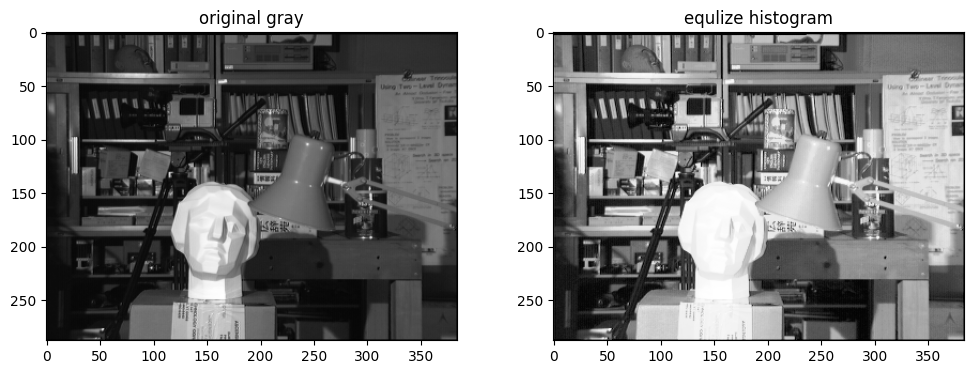

In [ ]:
img = cv.imread(r"D:/test.computer_vision/l2/img/statue.png", 0)
result = cv.equalizeHist(img)                                       # global histogram equalization has bad point in light things in picture

plt.figure(figsize=[12,4])
plt.subplot(121); plt.imshow(img, cmap='gray'); plt.title('original gray') 
plt.subplot(122); plt.imshow(result, cmap='gray'); plt.title('equlize histogram') 

Text(0.5, 1.0, 'equlize histogram')

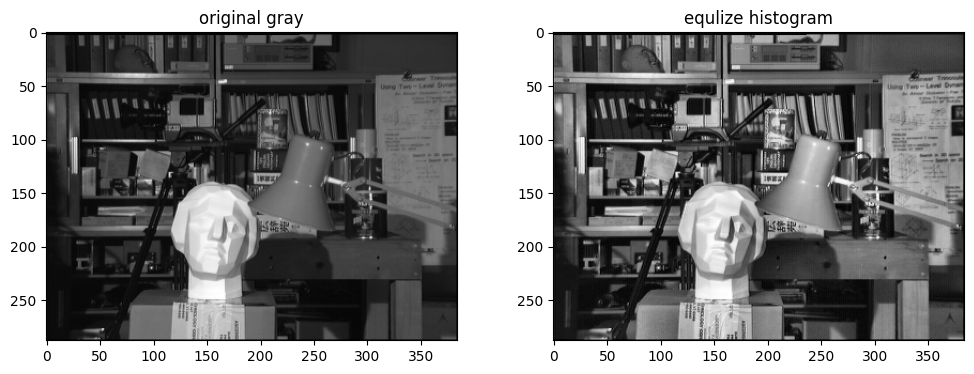

In [ ]:
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))               # equalization whit CLAHE metode
result = clahe.apply(img)

plt.figure(figsize=[12,4])
plt.subplot(121); plt.imshow(img, cmap='gray'); plt.title('original gray') 
plt.subplot(122); plt.imshow(result, cmap='gray'); plt.title('equlize histogram') 

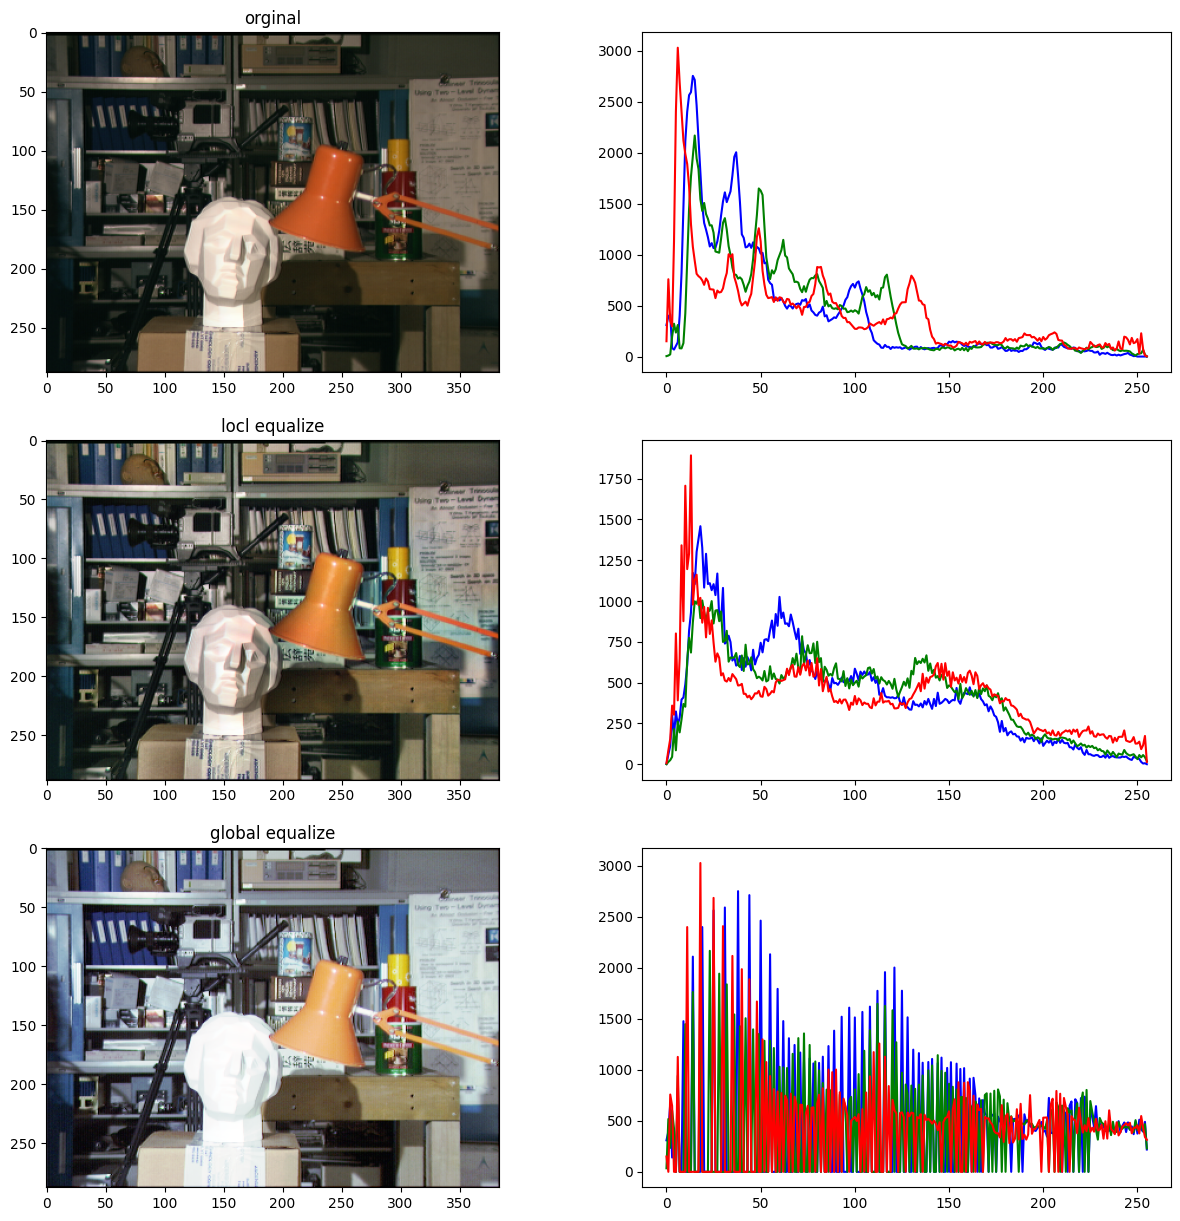

In [52]:
img = cv.imread(r"D:/test.computer_vision/l2/img/statue.png")

channels = cv.split(img)
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))    
eq_channel = []
for ch in channels:
    eq_channel.append(clahe.apply(ch))          # local
eq_clahe_img = cv.merge(eq_channel)

eq_channel = []
for ch in channels:
    eq_channel.append(cv.equalizeHist(ch))      # global
eq_img = cv.merge(eq_channel)


plt.figure(figsize=[15,15])
plt.subplot(321); plt.imshow(img[...,::-1]); plt.title('orginal'); 
plt.subplot(323); plt.imshow(eq_clahe_img[...,::-1]); plt.title('locl equalize'); 
plt.subplot(325); plt.imshow(eq_img[...,::-1]); plt.title('global equalize'); 


color = ['b', 'g', 'r']
plt.subplot(322); 
for i, col in enumerate(color):
    histogram = cv.calcHist([img], [i], None, [256], [0,256])
    plt.plot(histogram, color = col)

plt.subplot(324); 
for i, col in enumerate(color):
    histogram = cv.calcHist([eq_clahe_img], [i], None, [256], [0,256])
    plt.plot(histogram, color = col)

plt.subplot(326); 
for i, col in enumerate(color):
    histogram = cv.calcHist([eq_img], [i], None, [256], [0,256])
    plt.plot(histogram, color = col)

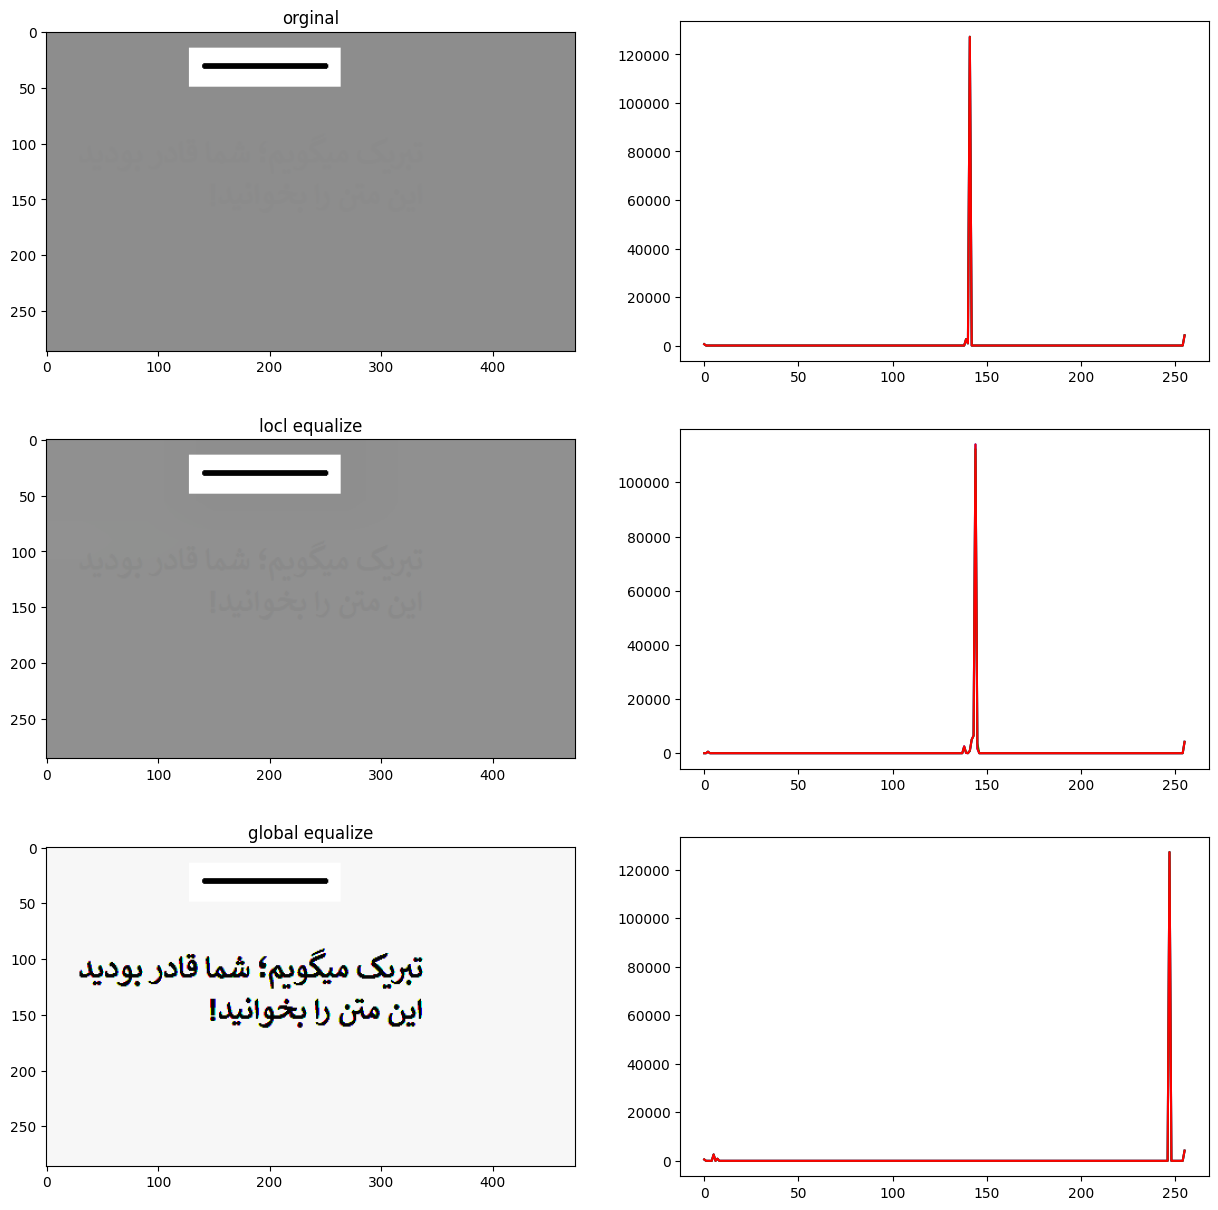

In [53]:
img = cv.imread(r"D:/test.computer_vision/l2/img/hidden.png")

channels = cv.split(img)
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))    
eq_channel = []
for ch in channels:
    eq_channel.append(clahe.apply(ch))          # local
eq_clahe_img = cv.merge(eq_channel)

eq_channel = []
for ch in channels:
    eq_channel.append(cv.equalizeHist(ch))      # global
eq_img = cv.merge(eq_channel)


plt.figure(figsize=[15,15])
plt.subplot(321); plt.imshow(img[...,::-1]); plt.title('orginal'); 
plt.subplot(323); plt.imshow(eq_clahe_img[...,::-1]); plt.title('locl equalize'); 
plt.subplot(325); plt.imshow(eq_img[...,::-1]); plt.title('global equalize'); 


color = ['b', 'g', 'r']
plt.subplot(322); 
for i, col in enumerate(color):
    histogram = cv.calcHist([img], [i], None, [256], [0,256])
    plt.plot(histogram, color = col)

plt.subplot(324); 
for i, col in enumerate(color):
    histogram = cv.calcHist([eq_clahe_img], [i], None, [256], [0,256])
    plt.plot(histogram, color = col)

plt.subplot(326); 
for i, col in enumerate(color):
    histogram = cv.calcHist([eq_img], [i], None, [256], [0,256])
    plt.plot(histogram, color = col)

image1 is:  (600, 800)
image2 is:  (300, 400)


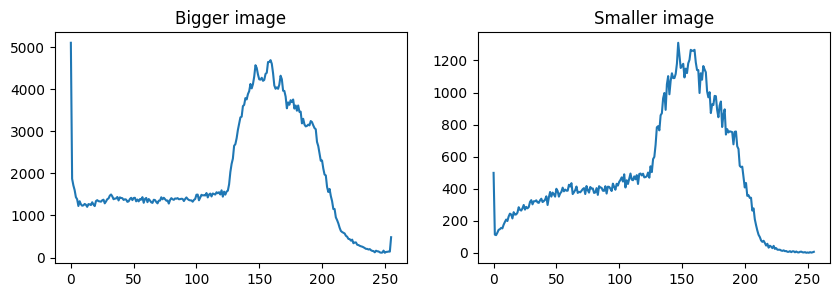

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

#load images in gray-scale
image1 = cv2.imread(r"D:/test.computer_vision/l2/img/input.jpg",0)
image2 = cv2.imread(r"D:/test.computer_vision/l2/img/input.small.jpg",0)

#print dimentions
print("image1 is: ", image1.shape)
print("image2 is: ", image2.shape)

#calculate histograms
histogram1 = cv2.calcHist([image1], [0], None, [256], [0, 256])
histogram2 = cv2.calcHist([image2], [0], None, [256], [0, 256])

#plot
plt.figure(figsize=[10,3])
plt.subplot(121);plt.plot(histogram1);plt.title("Bigger image");
plt.subplot(122);plt.plot(histogram2);plt.title("Smaller image");

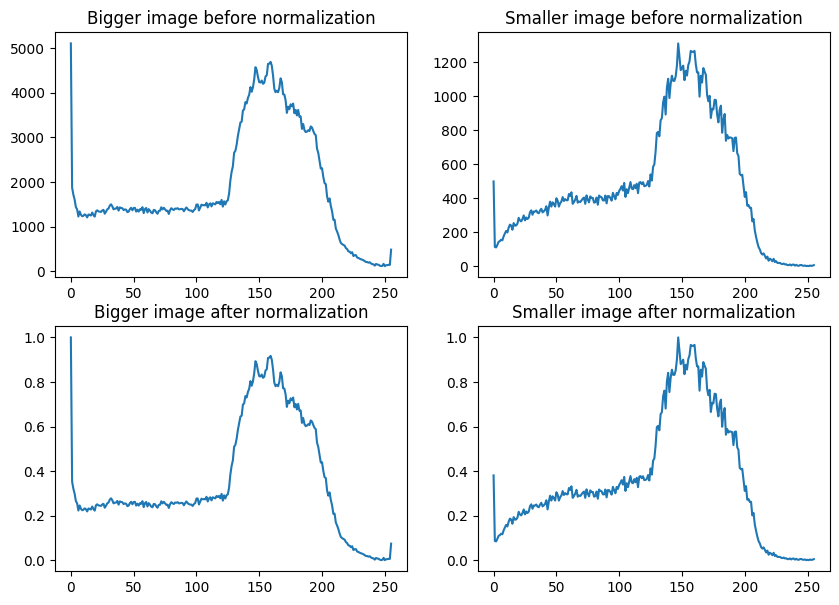

In [58]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

#load images in gray-scale
image1 = cv2.imread(r"D:/test.computer_vision/l2/img/input.jpg",0)
image2 = cv2.imread(r"D:/test.computer_vision/l2/img/input.small.jpg",0)

#calculate histograms
histogram1 = cv2.calcHist([image1], [0], None, [256], [0, 256])
histogram2 = cv2.calcHist([image2], [0], None, [256], [0, 256])

#copy histograms
histogram1_normalized = histogram1.copy()
histogram2_normalized = histogram2.copy()

#normalize histograms
cv2.normalize(histogram1, histogram1_normalized, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX);
cv2.normalize(histogram2, histogram2_normalized, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX);

#plot
plt.figure(figsize=[10,7])
plt.subplot(221);plt.plot(histogram1);plt.title("Bigger image before normalization");
plt.subplot(222);plt.plot(histogram2);plt.title("Smaller image before normalization");

plt.subplot(223);plt.plot(histogram1_normalized);plt.title("Bigger image after normalization");
plt.subplot(224);plt.plot(histogram2_normalized);plt.title("Smaller image after normalization");

Perfect: 0.0, 
Base-Half:0.3106651880104802, 
Base-Test(1):0.7498451093056697, 
Base-Test(2) :0.9464567389602986


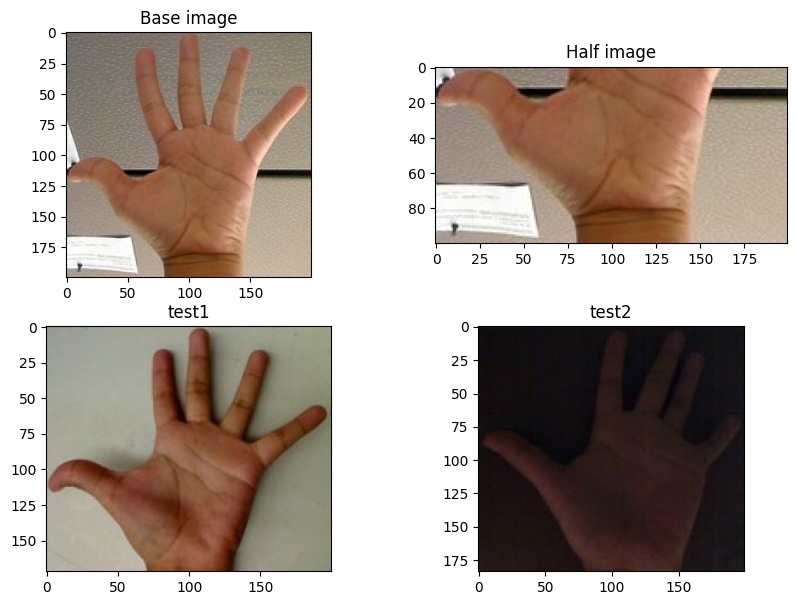

In [59]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


src_base = cv2.imread("D:/test.computer_vision/l2/img/Histogram_Comparison_Source_0.jpg")
src_test1 = cv2.imread("D:/test.computer_vision/l2/img/Histogram_Comparison_Source_1.jpg")
src_test2 = cv2.imread("D:/test.computer_vision/l2/img/Histogram_Comparison_Source_2.jpg")

hsv_base = cv2.cvtColor(src_base, cv2.COLOR_BGR2HSV)
hsv_test1 = cv2.cvtColor(src_test1, cv2.COLOR_BGR2HSV)
hsv_test2 = cv2.cvtColor(src_test2, cv2.COLOR_BGR2HSV)

# create an image of half the base image (in HSV format):
hsv_half_down = hsv_base[hsv_base.shape[0]//2:,:]
                       
               
hist_base = cv2.calcHist([hsv_base], [0, 1], None,  [180,256], [0,180,0,256])
cv2.normalize(hist_base, hist_base, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
hist_half_down = cv2.calcHist([hsv_half_down], [0, 1], None,  [180,256], [0,180,0,256])
cv2.normalize(hist_half_down, hist_half_down, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
hist_test1 = cv2.calcHist([hsv_test1], [0, 1], None,  [180,256], [0,180,0,256])
cv2.normalize(hist_test1, hist_test1, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
hist_test2 = cv2.calcHist([hsv_test2], [0, 1], None,  [180,256], [0,180,0,256])
cv2.normalize(hist_test2, hist_test2, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
                       
base_base = cv2.compareHist(hist_base, hist_base, cv2.HISTCMP_BHATTACHARYYA)
base_half = cv2.compareHist(hist_base, hist_half_down, cv2.HISTCMP_BHATTACHARYYA)
base_test1 = cv2.compareHist(hist_base, hist_test1, cv2.HISTCMP_BHATTACHARYYA)
base_test2 = cv2.compareHist(hist_base, hist_test2, cv2.HISTCMP_BHATTACHARYYA)


plt.figure(figsize=[10,7])
plt.subplot(221);plt.imshow(src_base[...,::-1]);plt.title("Base image");
plt.subplot(222);plt.imshow(cv2.cvtColor(hsv_half_down, cv2.COLOR_HSV2RGB));plt.title("Half image");
plt.subplot(223);plt.imshow(src_test1[...,::-1]);plt.title("test1");
plt.subplot(224);plt.imshow(src_test2[...,::-1]);plt.title("test2");


print('Perfect: {}, \nBase-Half:{}, \nBase-Test(1):{}, \nBase-Test(2) :{}'.format(\
          base_base, base_half, base_test1, base_test2))

Method: cv2.HISTCMP_BHATTACHARYYA
 -Perfect: 0.0, 
 -Base-Half:0.3106651880104802, 
 -Base-Test(1):0.7498451093056697, 
 -Base-Test(2) :0.9464567389602986
---
Method: cv2.HISTCMP_CHISQR
 -Perfect: 0.0, 
 -Base-Half:34.033593851598084, 
 -Base-Test(1):661.1060186682498, 
 -Base-Test(2) :1712.5495483048298
---
Method: cv2.HISTCMP_CORREL
 -Perfect: 1.0, 
 -Base-Half:0.8263068078730407, 
 -Base-Test(1):0.0820323152728836, 
 -Base-Test(2) :0.02074296934219765
---
Method: cv2.HISTCMP_INTERSECT
 -Perfect: 92.59259354695678, 
 -Base-Half:46.73931341874413, 
 -Base-Test(1):11.652202861383557, 
 -Base-Test(2) :4.535974983125925
---
Method: cv2.HISTCMP_KL_DIV
 -Perfect: 0.0, 
 -Base-Half:180.49322003660623, 
 -Base-Test(1):653.7298110863732, 
 -Base-Test(2) :1676.0983346142905
---


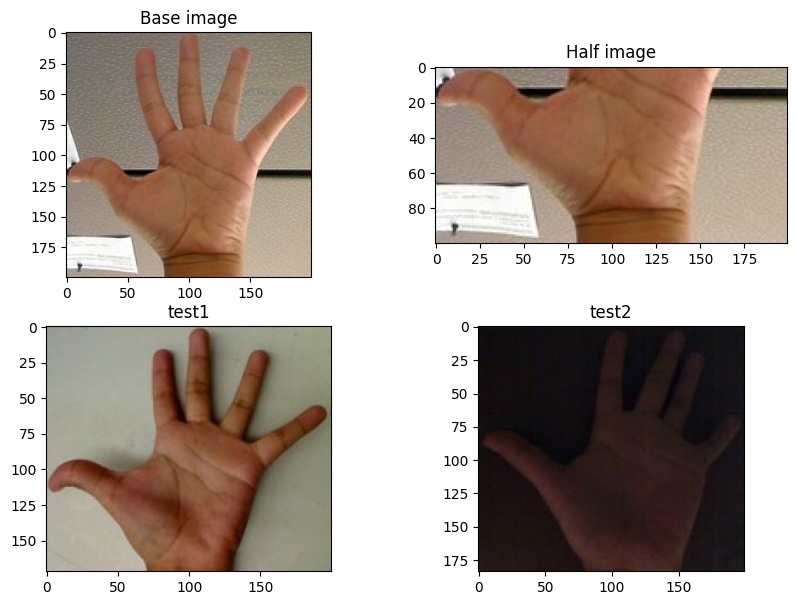

In [60]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


src_base = cv2.imread("D:/test.computer_vision/l2/img/Histogram_Comparison_Source_0.jpg")
src_test1 = cv2.imread("D:/test.computer_vision/l2/img/Histogram_Comparison_Source_1.jpg")
src_test2 = cv2.imread("D:/test.computer_vision/l2/img/Histogram_Comparison_Source_2.jpg")

hsv_base = cv2.cvtColor(src_base, cv2.COLOR_BGR2HSV)
hsv_test1 = cv2.cvtColor(src_test1, cv2.COLOR_BGR2HSV)
hsv_test2 = cv2.cvtColor(src_test2, cv2.COLOR_BGR2HSV)

# create an image of half the base image (in HSV format):
hsv_half_down = hsv_base[hsv_base.shape[0]//2:,:]
                       
               
hist_base = cv2.calcHist([hsv_base], [0, 1], None,  [180,256], [0,180,0,256])
cv2.normalize(hist_base, hist_base, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
hist_half_down = cv2.calcHist([hsv_half_down], [0, 1], None,  [180,256], [0,180,0,256])
cv2.normalize(hist_half_down, hist_half_down, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
hist_test1 = cv2.calcHist([hsv_test1], [0, 1], None,  [180,256], [0,180,0,256])
cv2.normalize(hist_test1, hist_test1, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
hist_test2 = cv2.calcHist([hsv_test2], [0, 1], None,  [180,256], [0,180,0,256])
cv2.normalize(hist_test2, hist_test2, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

plt.figure(figsize=[10,7])
plt.subplot(221);plt.imshow(src_base[...,::-1]);plt.title("Base image");
plt.subplot(222);plt.imshow(cv2.cvtColor(hsv_half_down, cv2.COLOR_HSV2RGB));plt.title("Half image");
plt.subplot(223);plt.imshow(src_test1[...,::-1]);plt.title("test1");
plt.subplot(224);plt.imshow(src_test2[...,::-1]);plt.title("test2");


methods = [cv2.HISTCMP_BHATTACHARYYA, cv2.HISTCMP_CHISQR, cv2.HISTCMP_CORREL, cv2.HISTCMP_INTERSECT, cv2.HISTCMP_KL_DIV]
method_names = ['cv2.HISTCMP_BHATTACHARYYA', 'cv2.HISTCMP_CHISQR', 'cv2.HISTCMP_CORREL', 'cv2.HISTCMP_INTERSECT', 'cv2.HISTCMP_KL_DIV']

for method, method_name in zip(methods, method_names):
    print("Method:", method_name)
    base_base = cv2.compareHist(hist_base, hist_base, method)
    base_half = cv2.compareHist(hist_base, hist_half_down, method)
    base_test1 = cv2.compareHist(hist_base, hist_test1, method)
    base_test2 = cv2.compareHist(hist_base, hist_test2, method)
    print(' -Perfect: {}, \n -Base-Half:{}, \n -Base-Test(1):{}, \n -Base-Test(2) :{}\n---'.format(\
              base_base, base_half, base_test1, base_test2))